In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from random_forest import RandomForest
from decision_tree import DecisionTree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('/home/dotronghiep/Documents/Datasets/Data_mining/bank.csv',  parse_dates = True)

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
X_df = df.iloc[:, :-1]
y_df = df.iloc[:, -1]
X = X_df.values
y = y_df.values

In [5]:
y[y == 'yes'] = 1
y[y == 'no'] = 0

In [6]:
class_counts = pd.Series(y).value_counts()
print(class_counts)

0    5873
1    5289
Name: count, dtype: int64


In [7]:
print(X.shape)
print(y.shape)

(11162, 16)
(11162,)


In [8]:
for i in range(X.shape[1]):
    unique_values = np.unique(X[:, i])
    print(f"feature {i}: {unique_values}")

feature 0: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89
 90 92 93 95]
feature 1: ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
feature 2: ['divorced' 'married' 'single']
feature 3: ['primary' 'secondary' 'tertiary' 'unknown']
feature 4: ['no' 'yes']
feature 5: [-6847 -3058 -2712 ... 56831 66653 81204]
feature 6: ['no' 'yes']
feature 7: ['no' 'yes']
feature 8: ['cellular' 'telephone' 'unknown']
feature 9: [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31]
feature 10: ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
feature 11: [2 3 4 ... 3253 3284 3881]
feature 12: [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33

In [9]:
label_encoder = LabelEncoder()
X_label = X.copy()

columns_indices_to_encode = [1, 2, 3, 4, 6, 7, 8, 10, 15]  

for column_index in columns_indices_to_encode:
    X_label[:, column_index] = label_encoder.fit_transform(X_label[:, column_index])

print(X_label[:5])

[[59 0 1 1 0 2343 1 0 2 5 8 1042 1 -1 0 3]
 [56 0 1 1 0 45 0 0 2 5 8 1467 1 -1 0 3]
 [41 9 1 1 0 1270 1 0 2 5 8 1389 1 -1 0 3]
 [55 7 1 1 0 2476 1 0 2 5 8 579 1 -1 0 3]
 [54 0 1 2 0 184 0 0 2 5 8 673 2 -1 0 3]]


In [10]:
X_onehot = X_label.copy()
columns_to_onehot = [1, 2, 3, 8, 10, 15]  

ct = ColumnTransformer(
    [('onehot', OneHotEncoder(drop='first'), columns_to_onehot)],
    remainder='passthrough'  # Giữ lại các cột không được chỉ định
)

X_onehot = ct.fit_transform(X_onehot)
print(X_onehot[:5])

[[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0
  0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 59 0 2343 1 0 5
  1042 1 -1 0]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0
  0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 56 0 45 0 0 5
  1467 1 -1 0]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0
  0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 41 0 1270 1 0 5
  1389 1 -1 0]
 [0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0
  0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 55 0 2476 1 0 5
  579 1 -1 0]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0
  0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 54 0 184 0 0 5
  673 2 -1 0]]


In [11]:
print("X's shape:", X.shape)
print("X_label's shape:", X_label.shape)
print("X_onehot's shape:", X_onehot.shape)

X's shape: (11162, 16)
X_label's shape: (11162, 16)
X_onehot's shape: (11162, 42)


In [12]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    start = datetime.now()
    model.fit(X_train, y_train)
    end = datetime.now()
    build_time = (end - start).total_seconds()
    
    start = datetime.now()
    y_pred = model.predict(X_test)
    end = datetime.now()
    test_time = (end - start).total_seconds()
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"{model_name} accuracy: {accuracy:.4f}, precision: {precision:.4f}, recall: {recall:.4f}, f1: {f1:.4f}")
    print(f"{model_name} build time: {build_time:.4f}, test time: {test_time:.4f}")
    print("====================================")


    
    return [accuracy, precision, recall, f1, build_time, test_time]

In [13]:
def comparative(X, y, loops=1, cate=True):
    global results_sk_tree, results_sk_forest, results_my_tree, results_my_forest
    y = y.astype('int')

    i=0
    for i in range(loops):
        print ("Time step: ", i+1)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        if not cate:
            # sklearn tree
            sk_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5) 
            results_sk_tree.append(evaluate_model(sk_tree, X_train, y_train, X_test, y_test, "sklearn tree"))       

            # sklearn forest
            sk_forest = RandomForestClassifier(criterion='entropy',n_estimators=10, max_depth=10, min_samples_split=5)
            results_sk_forest.append(evaluate_model(sk_forest, X_train, y_train, X_test, y_test, "sklearn forest"))

        # my tree
        my_tree = DecisionTree(max_depth=10, min_samples_split=5)
        results_my_tree.append(evaluate_model(my_tree, X_train, y_train, X_test, y_test, "my tree"))
    

        # my forest
        my_forest = RandomForest(num_trees=10, max_depth=10, min_samples_split=5)
        results_my_forest.append(evaluate_model(my_forest, X_train, y_train, X_test, y_test, "my forest"))


In [14]:
# results
results_my_tree = []
results_my_forest = []
results_sk_tree = []
results_sk_forest = [] 

In [15]:
comparative(X_onehot, y, 50, cate=False)

Time step:  1
sklearn tree accuracy: 0.8424, precision: 0.8119, recall: 0.8660, f1: 0.8381
sklearn tree build time: 0.0459, test time: 0.0022


sklearn forest accuracy: 0.8298, precision: 0.8088, recall: 0.8365, f1: 0.8224
sklearn forest build time: 0.0738, test time: 0.0052
my tree accuracy: 0.8406, precision: 0.8118, recall: 0.8612, f1: 0.8358
my tree build time: 178.8262, test time: 0.0054
my forest accuracy: 0.8415, precision: 0.8040, recall: 0.8774, f1: 0.8391
my forest build time: 1165.0432, test time: 0.0475
Time step:  2
sklearn tree accuracy: 0.8012, precision: 0.7455, recall: 0.8762, f1: 0.8056
sklearn tree build time: 0.0320, test time: 0.0017
sklearn forest accuracy: 0.8298, precision: 0.7903, recall: 0.8686, f1: 0.8276
sklearn forest build time: 0.0470, test time: 0.0030
my tree accuracy: 0.8047, precision: 0.7512, recall: 0.8743, f1: 0.8081
my tree build time: 150.1039, test time: 0.0044
my forest accuracy: 0.8356, precision: 0.7906, recall: 0.8848, f1: 0.8351
my forest build time: 1066.1401, test time: 0.0460
Time step:  3
sklearn tree accuracy: 0.8021, precision: 0.7549, recall: 0.8533, f1: 0.8011
sklearn tree 

KeyboardInterrupt: 

In [ ]:
results_my_tree = np.array(results_my_tree)
results_my_forest = np.array(results_my_forest)
results_sk_tree = np.array(results_sk_tree)
results_sk_forest = np.array(results_sk_forest)

In [ ]:
def box_plot(data, y, cat=False):
    plt.boxplot(data, showfliers=True)
    plt.xlabel('Methods')
    plt.ylabel(y)
    if cat==True:
        plt.xticks([1, 2], ['My Tree', 'My Forest'])
    else:
        plt.xticks([1, 2, 3, 4], ['My Tree', 'My Forest', 'Sklearn Tree', 'Sklearn Forest'])
    plt.show()

In [ ]:
def calculate_mean(array):
    # Tính trung bình của từng cột
    means = np.mean(array, axis=0)
    
    return means

In [ ]:
mean = calculate_mean(results_my_forest)
print("Mean of sklearn tree: ", mean)

Mean of sklearn tree:  [6.78334080e-01 7.77835776e-01 4.54603493e-01 5.67717964e-01
 1.34937540e+02 4.12262200e-02]


Categories data

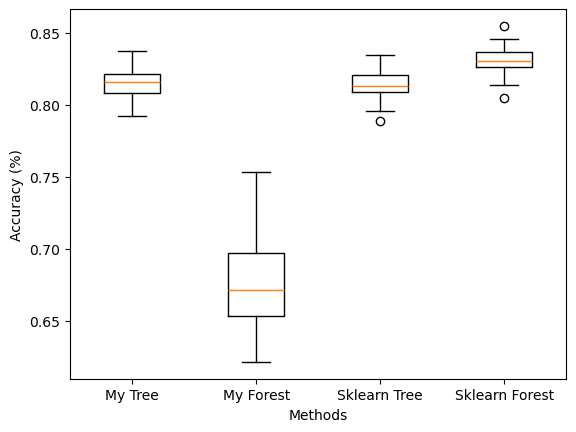

In [ ]:
# accuracy
box_plot([results_my_tree[:,0], results_my_forest[:,0], results_sk_tree[:,0], results_sk_forest[:,0]], y='Accuracy (%)', cat=False)

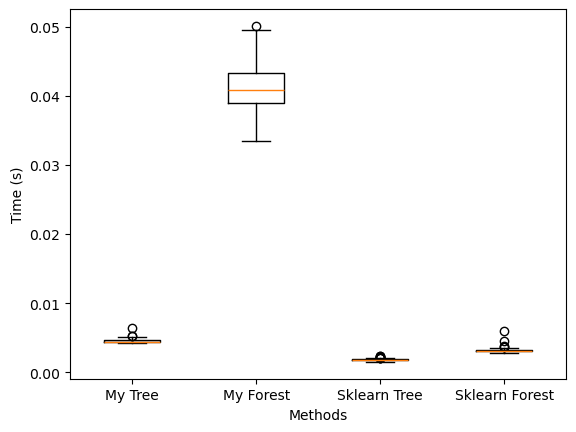

In [ ]:
# time
box_plot([results_my_tree[:,5], results_my_forest[:,5], results_sk_tree[:,5], results_sk_forest[:,5]], y='Time (s)', cat=False)